# Decision Function and Prediction Probability

Follow _Introduction to Machine Learning_ 
- [Chapter 2](https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb) **Section 2.7 Uncertanty estimates from classifiers** (p.121 - 125)
- [Chapter 5](https://github.com/amueller/introduction_to_ml_with_python/blob/master/05-model-evaluation-and-improvement.ipynb) **Section 5.3.2 Metrics for Binary Classification**  - taking uncertainty into account (p.292)


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import mglearn

## Uncertainty estimates from classifiers
>... the ability of classifiers to provide uncertainty estimates of predictions. Often, you are not only interested in which class a classifier predicts for a certain test point, but also how certain it is that this is the right class.

>There are two different functions in scikit-learn that can be used to obtain uncertainty estimates from classifiers: decision_function and predict_proba. Most (but not all) classifiers have at least one of them, and many classifiers have both.

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes "blue" and "red" for illustration purposes:
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_val, y_train_named, y_val_named, y_train, y_val = \
    train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

### Decision function
For each sample, the decision function produces a value that indicates how certain the classfier is that this sample belongs to a class.

The range of the decision function can be arbitrary, and spans positive and negative values. However, by default a value of 0 determines the decision boundary.

In [11]:
print("X_val.shape:", X_val.shape)
print("Decision function shape:",
      gbrt.decision_function(X_val).shape)

X_val.shape: (25, 2)
Decision function shape: (25,)


In [12]:
# show the first few entries of decision_function
print("Decision function:", gbrt.decision_function(X_val)[:6])

Decision function: [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


>We can recover the prediction by looking only at the sign of the decision function:

In [13]:
print("Thresholded decision function:\n",
      gbrt.decision_function(X_val) > 0)
print("Predictions:\n", gbrt.predict(X_val))

Thresholded decision function:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


>For binary classification, the “negative” class is always the first entry of the classes_ attribute, and the “positive” class is the second entry of classes_. So if you want to fully recover the output of predict, you need to make use of the classes_ attribute:

In [14]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_val) > 0).astype(int)
# use 0 and 1 as indices into classes_ (classes is ['blue', 'red'])
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions:",
      np.all(pred == gbrt.predict(X_val)))

pred is equal to predictions: True


How does the indexing work here to recover 'red' and 'blue'?

In [15]:
gbrt.classes_

array(['blue', 'red'], dtype='<U4')

In [16]:
pred

array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], dtype='<U4')

In [17]:
greater_zero

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0])

In [18]:
np.array(['blue', 'red'])[np.array([0, 0, 1])]

array(['blue', 'blue', 'red'], dtype='<U4')

### What is the range of the decision function?

In [19]:
decision_function = gbrt.decision_function(X_val)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


>This arbitrary scaling makes the output of decision_function often hard to interpret.

>In the following example we plot the decision_function for all points in the 2D plane using a color coding, next to a visualization of the decision boundary, as we saw earlier. We show training points as circles and test data as triangles

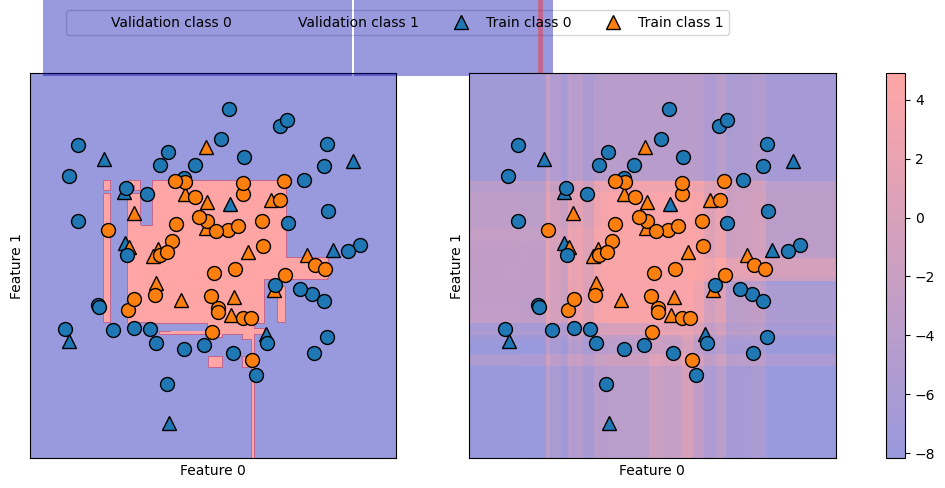

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and validation points
    mglearn.discrete_scatter(X_val[:, 0], X_val[:, 1], y_val,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
axes[0].legend(["Validation class 0", "Validation class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

### Prediction probability

For each sample, the prediction probability indicates how certain the classfier is that this sample belongs to a class.

The range of the probability is between 0 and 1. By default a probability of 0.5 determines the decision boundary.

In [21]:
print("Shape of probabilities:", gbrt.predict_proba(X_val).shape)

Shape of probabilities: (25, 2)


We get two probabilities for each sample, one for the negative and one for the positive class.

In [22]:
# show the first few entries of predict_proba
print("Predicted probabilities:")
print(gbrt.predict_proba(X_val[:6]))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


When plotting the probability, we choose the positive class.

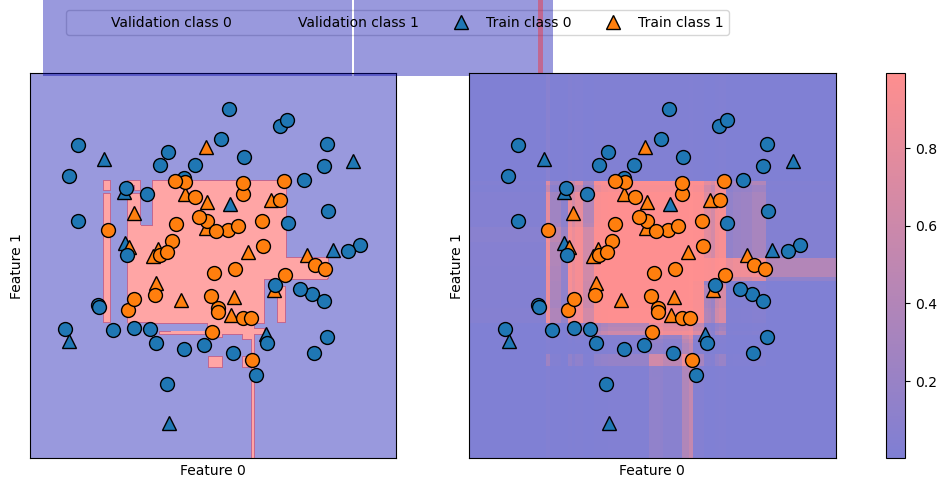

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and Validation points
    mglearn.discrete_scatter(X_val[:, 0], X_val[:, 1], y_val,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
axes[0].legend(["Validation class 0", "Validation class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

## Changing decision thresholds
>As we discussed in Chapter 2, most classifiers provide a decision_function or a predict_proba method to assess degrees of certainty about predictions. Making predictions can be seen as thresholding the output of decision_function or predict_proba at a certain fixed point—in binary classification we use 0 for the decision function and 0.5 for predict_proba.

In [24]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

For decision functions, positive values indicate positive class; negative values negative class by default.

Applying a threshold that is lower than 0 will move the decision boundary in the direction of the negative class, hence, growing the positive class region:

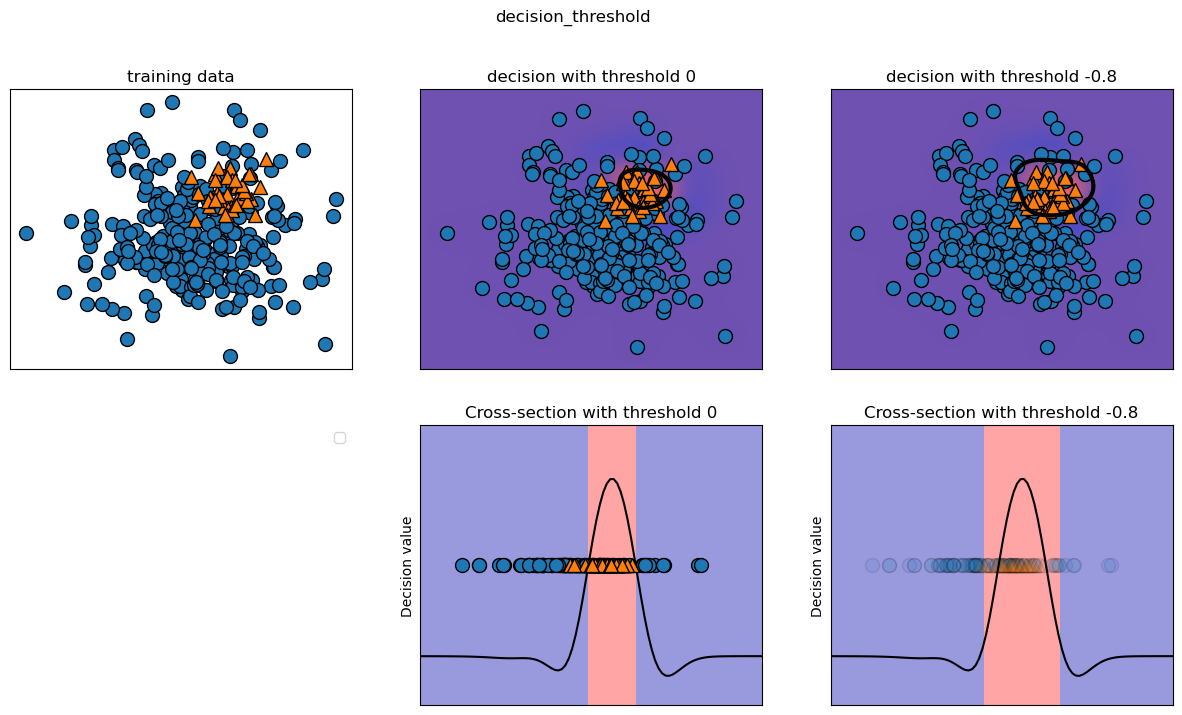

In [25]:
mglearn.plots.plot_decision_threshold()

Be decreasing the threshold, we therefore predict more positive classes. We should be able to catch more actual positives, not make false negative mistakes, and recall should go up.

On the other hand, we will make more false positive mistakes now, as we are predicting more positive class samples. Precision will drop, we are less often correct.

Let's have a look at the classification reports and confusion matrix with and without threshold adjustment:

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_val, svc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



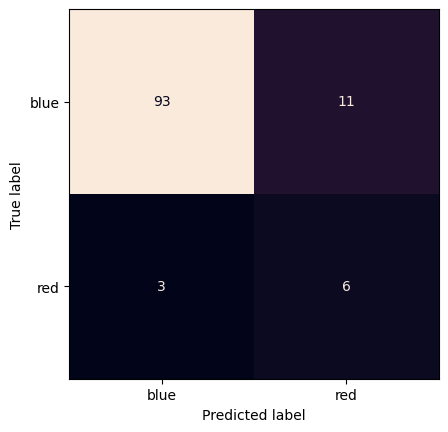

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_val, 
                                        svc.predict(X_val), 
                                        display_labels=['blue', 'red'],
                                        cmap='rocket',
                                        colorbar=False);

In [28]:
y_pred_lower_threshold = svc.decision_function(X_val) > -0.8

In [29]:
print(classification_report(y_val, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



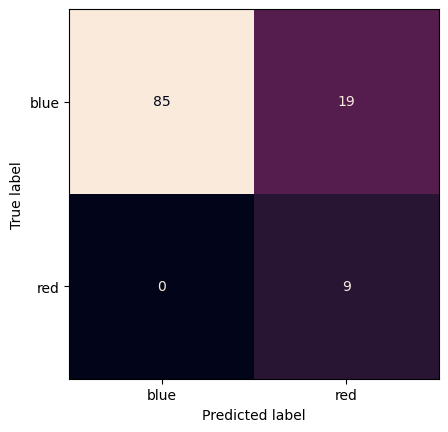

In [30]:
ConfusionMatrixDisplay.from_predictions(y_val, 
                                        y_pred_lower_threshold, 
                                        display_labels=['blue', 'red'],
                                        cmap='rocket',
                                        colorbar=False);

Adjusting the threshold in the other direction, more positive, should have the oposite effect:
- recall goes down
- precision goes up

In [31]:
y_pred_higher_threshold = svc.decision_function(X_val) > 0.8

In [32]:
print(classification_report(y_val, y_pred_higher_threshold))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       104
           1       0.50      0.44      0.47         9

    accuracy                           0.92       113
   macro avg       0.73      0.70      0.71       113
weighted avg       0.92      0.92      0.92       113



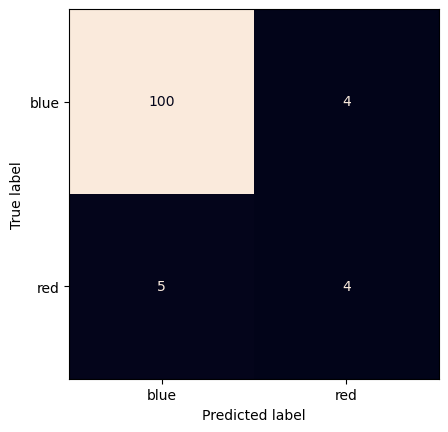

In [33]:
ConfusionMatrixDisplay.from_predictions(y_val, 
                                        y_pred_higher_threshold, 
                                        display_labels=['blue', 'red'],
                                        cmap='rocket',
                                        colorbar=False);